# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 18:24:30--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d8bd6b9d34e9394dc0d41cc5f.dl.dropboxusercontent.com/cd/0/inline/CQ62NElg_BTPO0NziYjUZKaf4xJBL1cwUokHAqduSEM5-hFqVAb6oylfnPp8FgA95LJvita7xmirezjcfgldo7CsxPmQ9wWK2Ln0zJxAEyhyqVepdZ8JFwAWzzCUWfGvd4nzSD_UYu5zBEEGVS2tS8JP/file# [following]
--2024-04-12 18:24:35--  https://uc3d8bd6b9d34e9394dc0d41cc5f.dl.dropboxusercontent.com/cd/0/inline/CQ62NElg_BTPO0NziYjUZKaf4xJBL1cwUokHAqduSEM5-hFqVAb6oylfnPp8FgA95LJvita7xmirezjcfgldo7CsxPmQ9wWK2Ln0zJxAEyhyqVepdZ8JFwAWzzCUWfGvd4nzSD_UYu5zBEEGVS2tS8JP/file
Resolving uc3d8bd6b9d34e9394dc0d41cc5f.dl.dropboxusercontent.com (uc3d8bd6b9d34e9394dc0d41cc5f.dl.dropboxusercontent.com)... 162.125.66.15, 26

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
file_path = 'HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
data = pd.read_csv(file_path)
display(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,12.715432,36.2


Get a brief description of the dataset

In [3]:
# TODO: you can use .info() and .description()
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [4]:
# TODO: drop MEDV and convert to numpy array
X = data.drop('MEDV', axis=1).values

X = np.array(X)
print(X[:5])

[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  2.96000000e+02 1.53000000e+01 3.96900000e+02 4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.96900000e+02 9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.18500000e+00 6.11000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.92830000e+02 4.03000000e+00]
 [3.23700000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 6.99800000e+00 4.58000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.94630000e+02 2.94000000e+00]
 [6.90500000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 7.14700000e+00 5.42000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.96900000e+02 1.27154321e+01]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

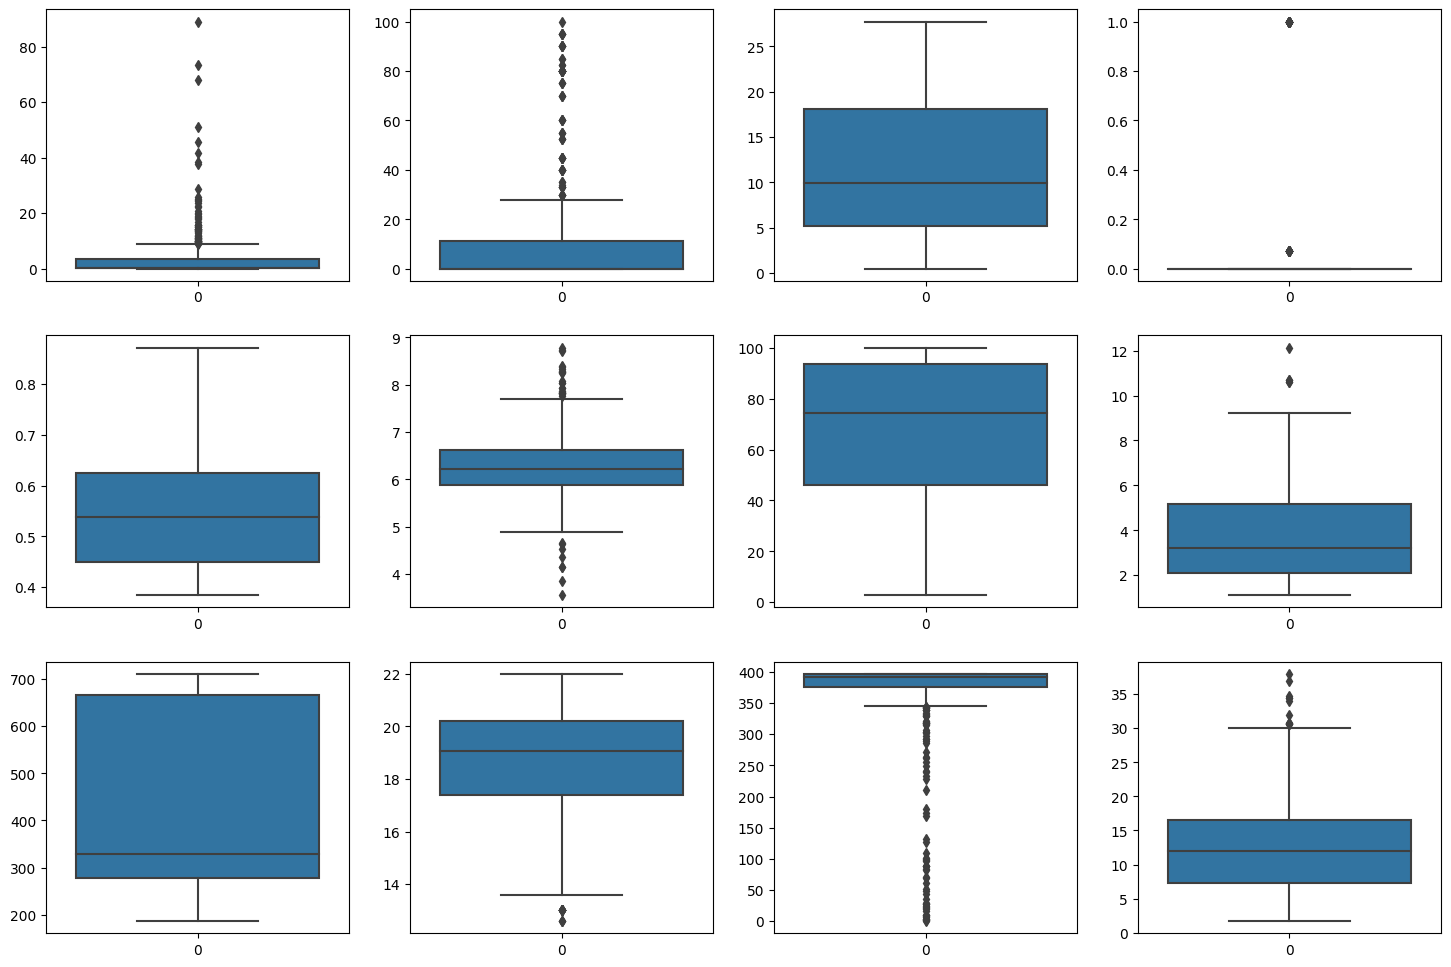

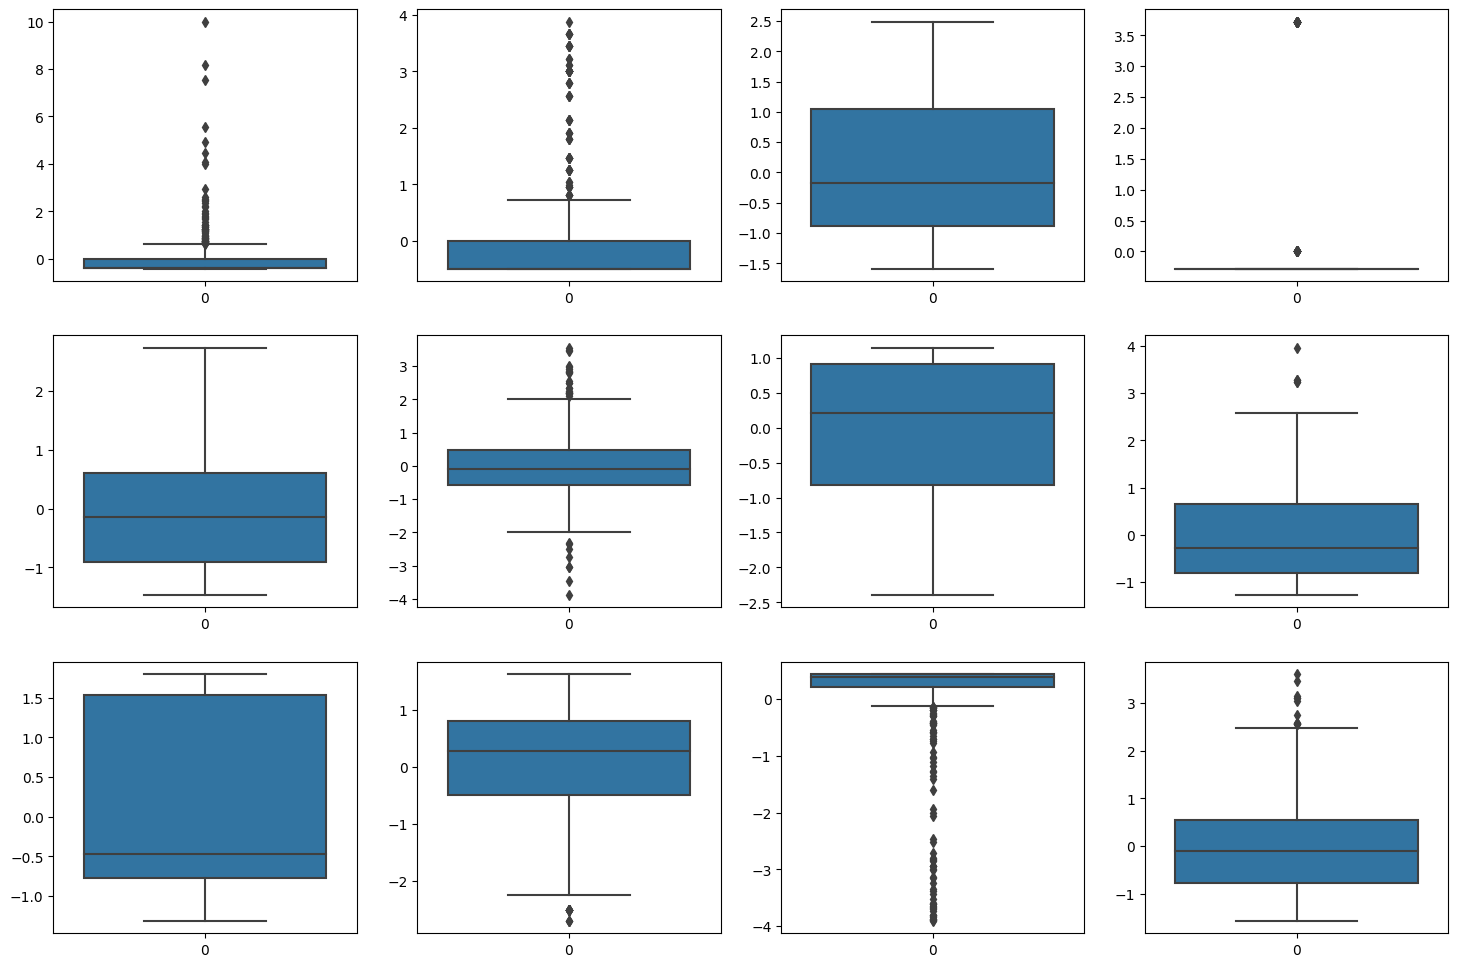

In [5]:
# look for outliers using box plot
columns = data.columns
# axis
fig, ax = plt.subplots(3, 4, figsize=(18, 12))
for i, column in enumerate(columns[:-1]):
    sns.boxplot(X[:, i], ax=ax[i//4, i%4])
plt.show()

# if There are some outliers in data, use StandardScaler can help in scaling data
scaler = StandardScaler()
X = scaler.fit_transform(X)

fig, ax = plt.subplots(3, 4, figsize=(18, 12))
for i, column in enumerate(columns[:-1]):
    sns.boxplot(X[:, i], ax=ax[i//4, i%4])
plt.show()

add polynomial features to increase model complexity!



In [6]:
# add polynomial features to increase model complexity!

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [7]:
# TODO: extract the MEDV
y = data['MEDV'].values
y = np.array(y)
print(y[:5])

[24.  21.6 34.7 33.4 36.2]




Split the dataset into two parts such that the training set contains 80% of the samples.

In [8]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [9]:
# TODO: Use sklearn
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
model

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the model:
[ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+0

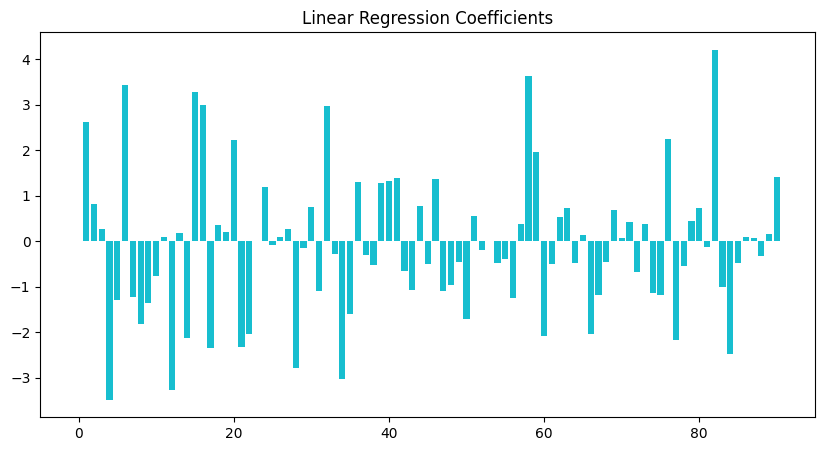

In [10]:
# Get the coefficients of the variables and visualize it nicely
print("Coefficients of the model:")
print(model.coef_)

# visualize the coefficients nicely
plt.figure(figsize=(10, 5))
plt.bar(range(len(model.coef_)), model.coef_, color='#17becf')
plt.title('Linear Regression Coefficients')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [11]:
# TODO: Calculate R² score and MSE on the training dataset
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'R² score on the training dataset:\t\t{r2}')
print(f'Mean Squared Error on the training dataset\t{mse}')

R² score on the training dataset:		0.9233615957926449
Mean Squared Error on the training dataset	6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [12]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² score on the testing dataset:\t\t{r2}')
print(f'Mean Squared Error on the testing dataset\t{mse}')


R² score on the testing dataset:		0.7528822884450891
Mean Squared Error on the testing dataset	18.122076674243075


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [13]:
# TODO: Use Lasso from sklearn library
model = Lasso(alpha=0.5)
model.fit(X_train, y_train)
model

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

Coefficients of the model:
[ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0

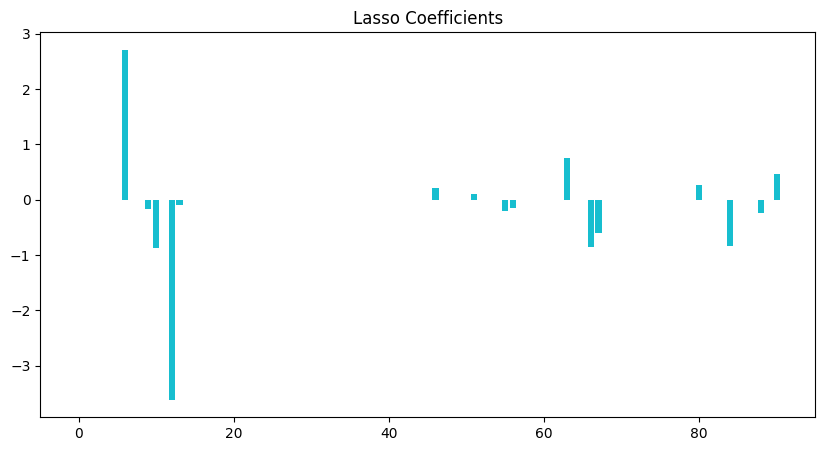

In [14]:
print("Coefficients of the model:")
print(model.coef_)

plt.figure(figsize=(10, 5))
plt.bar(range(len(model.coef_)), model.coef_, color='#17becf')
plt.title('Lasso Coefficients')
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.


1- L1 regularization produces sparse solutions, meaning many of the coefficients can become exactly zero. This can be observed from the distribution of coefficients, where a significant number of them might be clustered around zero.

2- Varying the regularization parameter, alpha, affects the degree of sparsity in the model coefficients. A higher alpha value increases the regularization strength, leading to more coefficients being shrunk to zero, thus increasing sparsity. Conversely, a lower alpha value results in less regularization, making the model more likely to fit the data closely but with a higher risk of overfitting and less sparsity in the coefficients.

Get the score value on train *dataset*


In [15]:
# TODO: Calculate R² score and MSE on the training dataset
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'R² score on the training dataset:\t\t{r2}')
print(f'Mean Squared Error on the training dataset\t{mse}')

R² score on the training dataset:		0.817128669448194
Mean Squared Error on the training dataset	15.886654948497318


Predict the value of "y" for each "x" belonging to the "testing" set

In [16]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² score on the testing dataset:\t\t{r2}')
print(f'Mean Squared Error on the testing dataset\t{mse}')

R² score on the testing dataset:		0.778718266278262
Mean Squared Error on the testing dataset	16.227426678090257


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [17]:
# TODO: Use Ridge from sklearn library
model = Ridge(alpha=10)
model.fit(X_train, y_train)
model

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

Coefficients of the model:
[ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.

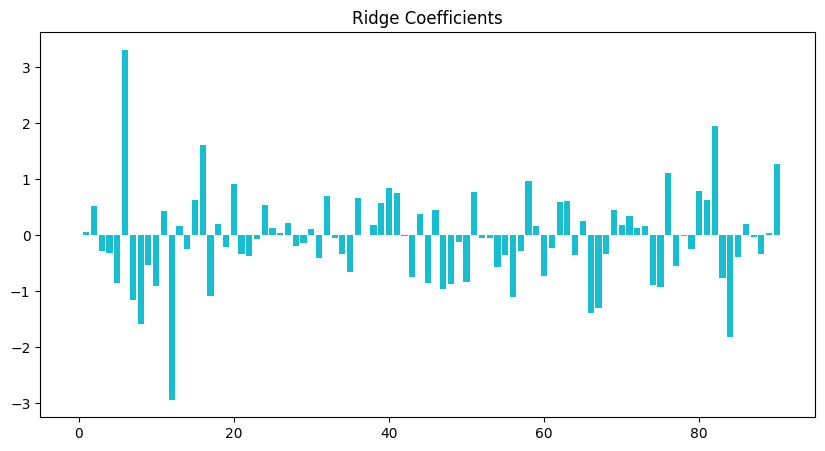

In [18]:
print("Coefficients of the model:")
print(model.coef_)
plt.figure(figsize=(10, 5))
plt.bar(range(len(model.coef_)), model.coef_, color='#17becf')
plt.title('Ridge Coefficients')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here

L1 regularization produces sparse models with many coefficients set to zero, leading to feature selection. L2 regularization shrinks coefficients more uniformly but doesn't necessarily reduce them to zero, allowing all features to contribute but with limited influence.

The regularization parameter in Ridge Regression controls the penalty on large coefficients. Higher values lead to more shrinkage, reducing overfitting but risking underfitting if set too high.

Get the score value on train *dataset*

In [19]:
# TODO: Calculate R² score and MSE on the training dataset
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'R² score on the training dataset:\t\t{r2}')
print(f'Mean Squared Error on the training dataset\t{mse}')

R² score on the training dataset:		0.9143940529441623
Mean Squared Error on the training dataset	7.436880009084568


Predict the value of "y" for each "x" belonging to the "testing" set



In [20]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² score on the testing dataset:\t\t{r2}')
print(f'Mean Squared Error on the testing dataset\t{mse}')

R² score on the testing dataset:		0.793955306875651
Mean Squared Error on the testing dataset	15.1100368469163


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [21]:
# HINT: Use DataFrame tools

data = {
    'Model': ['Linear Regression', 'Lasso', 'Ridge'],
    'R² score (train)': [0.9233, 0.8171, 0.9143],
    'R² score (test)': [0.7528, 0.7787, 0.7939],
    'MSE (train)': [6.6578, 15.8866, 7.4368],
    'MSE (test)': [18.1220, 16.2274, 15.1100]
}

df = pd.DataFrame(data)
display(df)


,Model,R² score (train),R² score (test),MSE (train),MSE (test)
0,Linear Regression,0.9233,0.7528,6.6578,18.1220
1,Lasso,0.8171,0.7787,15.8866,16.2274
2,Ridge,0.9143,0.7939,7.4368,15.1100


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.

- Ridge regression had the best R² score on the test data at 0.7939, indicating it was the best model in terms of explaining the variance in the test dataset. Additionally, it had the lowest Mean Squared Error (MSE) on the test data at 15.1100, suggesting it predicted the test data with the least amount of error among the three models.


- This differnce usually indicates overfitting, where the model is too closely fitted to the noises of the training data, failing to generalize well to unseen data.

- Regularization in Lasso and Ridge helps manage overfitting by penalizing large coefficients, making the model less sensitive to the noise in the training data. This explains why Lasso and Ridge, despite having slightly worse performance on the training data, outperform Linear Regression on the test data. Lasso, in particular, can create sparser models by reducing some coefficients to zero, which may have helped it perform best on the test data by focusing on the most relevant features.

        